In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd

df = pd.read_csv(r"D:\hp\Desktop\ML project\dataset_updated.csv")
df.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,0,0,2
1,P0738,28,92,2,116,151,38.5,2,1,3
2,P0741,29,91,1,79,135,38.4,0,0,3
3,P0661,24,96,1,95,92,37.3,0,0,2
4,P0412,20,96,1,97,97,37.4,0,0,1


In [8]:
df.shape


(1000, 10)

In [9]:
df.dtypes

Patient_ID               str
Respiratory_Rate       int64
Oxygen_Saturation      int64
O2_Scale               int64
Systolic_BP            int64
Heart_Rate             int64
Temperature          float64
Consciousness          int64
On_Oxygen              int64
Risk_Level             int64
dtype: object

In [10]:
df.columns

Index(['Patient_ID', 'Respiratory_Rate', 'Oxygen_Saturation', 'O2_Scale',
       'Systolic_BP', 'Heart_Rate', 'Temperature', 'Consciousness',
       'On_Oxygen', 'Risk_Level'],
      dtype='str')

In [11]:
df['Risk_Level'].value_counts()

Risk_Level
2    306
3    279
1    255
0    160
Name: count, dtype: int64

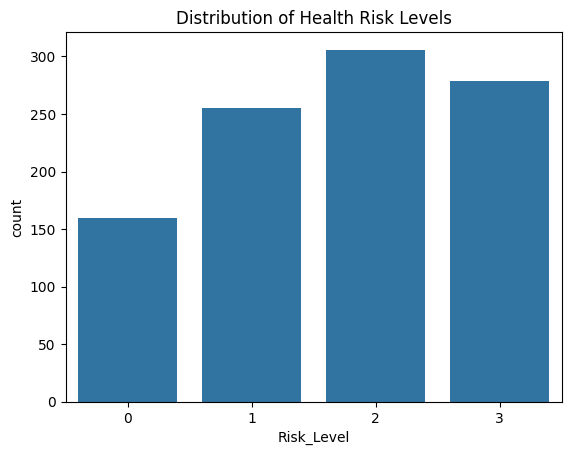

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Risk_Level', data=df)
plt.title("Distribution of Health Risk Levels")
plt.show()

In [13]:
df.describe()


,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,21.511000,92.59000,1.124000,106.160000,98.460000,37.921000,0.15100,0.274000,1.704000
std,5.287517,4.47302,0.329746,17.897562,19.694626,1.113696,0.56967,0.446232,1.042819
min,12.000000,74.00000,1.000000,50.000000,60.000000,35.600000,0.00000,0.000000,0.000000
25%,17.000000,90.00000,1.000000,94.000000,84.000000,37.100000,0.00000,0.000000,1.000000
50%,20.000000,94.00000,1.000000,109.000000,95.500000,37.800000,0.00000,0.000000,2.000000
75%,25.000000,96.00000,1.000000,119.000000,109.000000,38.600000,0.00000,1.000000,3.000000
max,40.000000,100.00000,2.000000,146.000000,163.000000,41.800000,3.00000,1.000000,3.000000


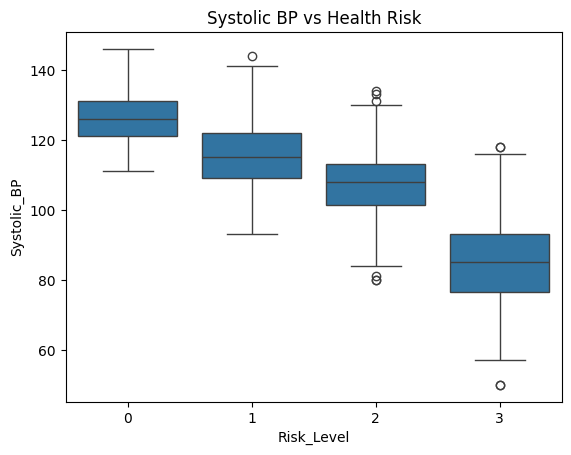

In [14]:
sns.boxplot(x='Risk_Level', y='Systolic_BP', data=df)
plt.title("Systolic BP vs Health Risk")
plt.show()

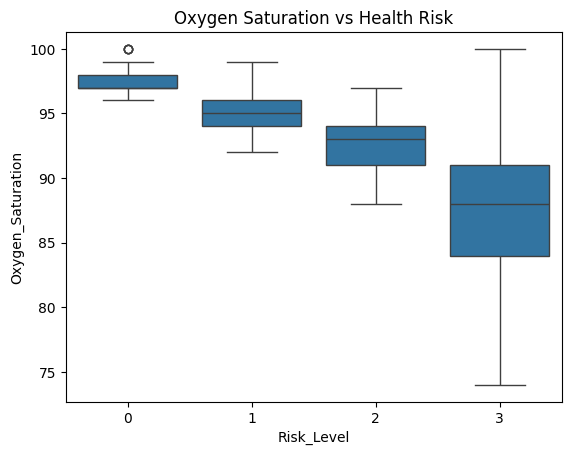

In [15]:
sns.boxplot(x='Risk_Level', y='Oxygen_Saturation', data=df)
plt.title("Oxygen Saturation vs Health Risk")
plt.show()

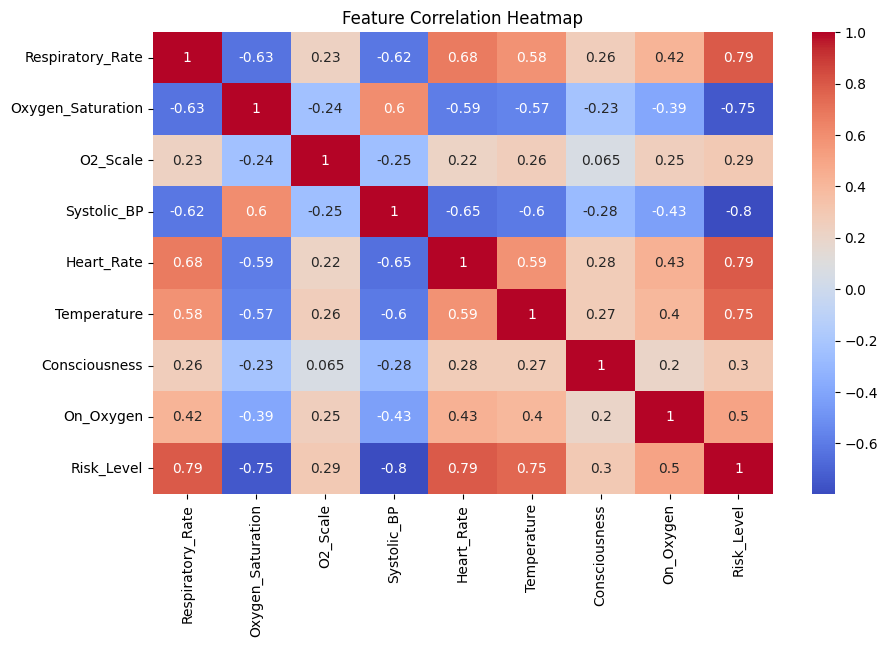

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.drop(columns=['Patient_ID']).corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
X = df.drop(columns=['Patient_ID', 'Risk_Level'])
y = df['Risk_Level']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [21]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.91      0.96      0.93        45
           2       0.93      0.95      0.94        57
           3       1.00      0.97      0.98        58

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.72      0.87      0.79        45
           2       0.88      0.74      0.80        57
           3       0.97      0.98      0.97        58

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200



In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.96      0.98      0.97        45
           2       0.96      0.96      0.96        57
           3       1.00      0.98      0.99        58

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [24]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

svm_pred = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.91      0.96      0.93        45
           2       0.95      0.95      0.95        57
           3       1.00      0.97      0.98        58

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [25]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(feature_importance)

Oxygen_Saturation    0.229663
Heart_Rate           0.199106
Systolic_BP          0.190020
Respiratory_Rate     0.168390
Temperature          0.168096
On_Oxygen            0.024275
O2_Scale             0.011303
Consciousness        0.009148
dtype: float64


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df[['Risk_Level', 'Cluster']].head()

,Risk_Level,Cluster
0,2,2
1,3,3
2,3,1
3,2,2
4,1,2


In [27]:
import joblib

joblib.dump(rf_model, "health_risk_rf_model.pkl")

['health_risk_rf_model.pkl']

In [29]:
df.groupby('Cluster').mean(numeric_only=True)

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
Cluster,,,,,,,,,
0,17.293151,95.923288,1.000000,121.498630,82.358904,36.933699,0.000000,0.043836,0.575342
1,28.263393,87.254464,1.245536,84.616071,121.741071,39.041964,0.138393,0.674107,3.000000
2,20.956164,92.994521,1.161644,106.336986,97.791781,38.064110,0.005479,0.210959,1.893151
3,26.500000,88.913043,1.217391,87.956522,118.152174,39.160870,2.565217,0.652174,2.847826
